## **1. Introduction & Objectives**
- This notebook aims to statistically validate or reject key hypotheses related to insurance risk and profitability.

Key Metrics:
- Claim Frequency = Number of policies with claims / Total number of policies
- Claim Severity = TotalClaims / Number of claims
- Margin = TotalPremium - TotalClaims
"""

----

## **2. Hypotheses to Test**
- H₀-1: No risk differences across provinces
- H₀-2: No risk differences between zip codes
- H₀-3: No significant margin differences between zip codes
- H₀-4: No significant risk difference between women and men

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

---

## **3. Data Preparation**

In [2]:
# Data Preparation
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.ab_testing import *
from src.utils import *

In [3]:
# Load data
df = pd.read_csv("../data/processed/cleaned_insurance_data.csv", low_memory=False)

In [4]:
# Drop rows with missing critical features
df = df.dropna(subset=["Gender", "PostalCode", "Province", "TotalClaims", "TotalPremium"])

# Ensure numeric types
df["TotalClaims"] = pd.to_numeric(df["TotalClaims"], errors="coerce")
df["TotalPremium"] = pd.to_numeric(df["TotalPremium"], errors="coerce")

# Compute basic metrics
df = compute_claim_metrics(df)

---

## **4. Segmentation & Group Formation**

In [5]:
# Example for Province
grouped_province = summarize_group_statistics(df, group_col="Province")

# Example for Gender
grouped_gender = summarize_group_statistics(df, group_col="Gender")


---

## **5. Statistical Testing**

### Perform statistical tests for different segments


Province Risk Difference:
t-statistic: -8.343, p-value: 0.000
Significant difference: True
Western Cape mean frequency: 0.002
Gauteng mean frequency: 0.003
Sample sizes - Western Cape: 170726, Gauteng: 386053

Most common postal codes:
PostalCode
2000    133498
122      49171
Name: count, dtype: int64

Zip Code Margin Difference (comparing 2000 vs 122):
t-statistic: 1.164, p-value: 0.244
Significant difference: False
Group 2000 mean margin: -8.11
Group 122 mean margin: -22.86
Sample sizes - 2000: 133498, 122: 49171

Zip Code Claim Frequency Difference (comparing 2000 vs 122):
t-statistic: -1.870, p-value: 0.062
Significant difference: False
Group 2000 mean frequency: 0.004
Group 122 mean frequency: 0.004
Sample sizes - 2000: 133498, 122: 49171

Gender Risk Difference:
chi2-statistic: 2511.300, p-value: 1.000
Significant difference: False
Degrees of freedom: 3202


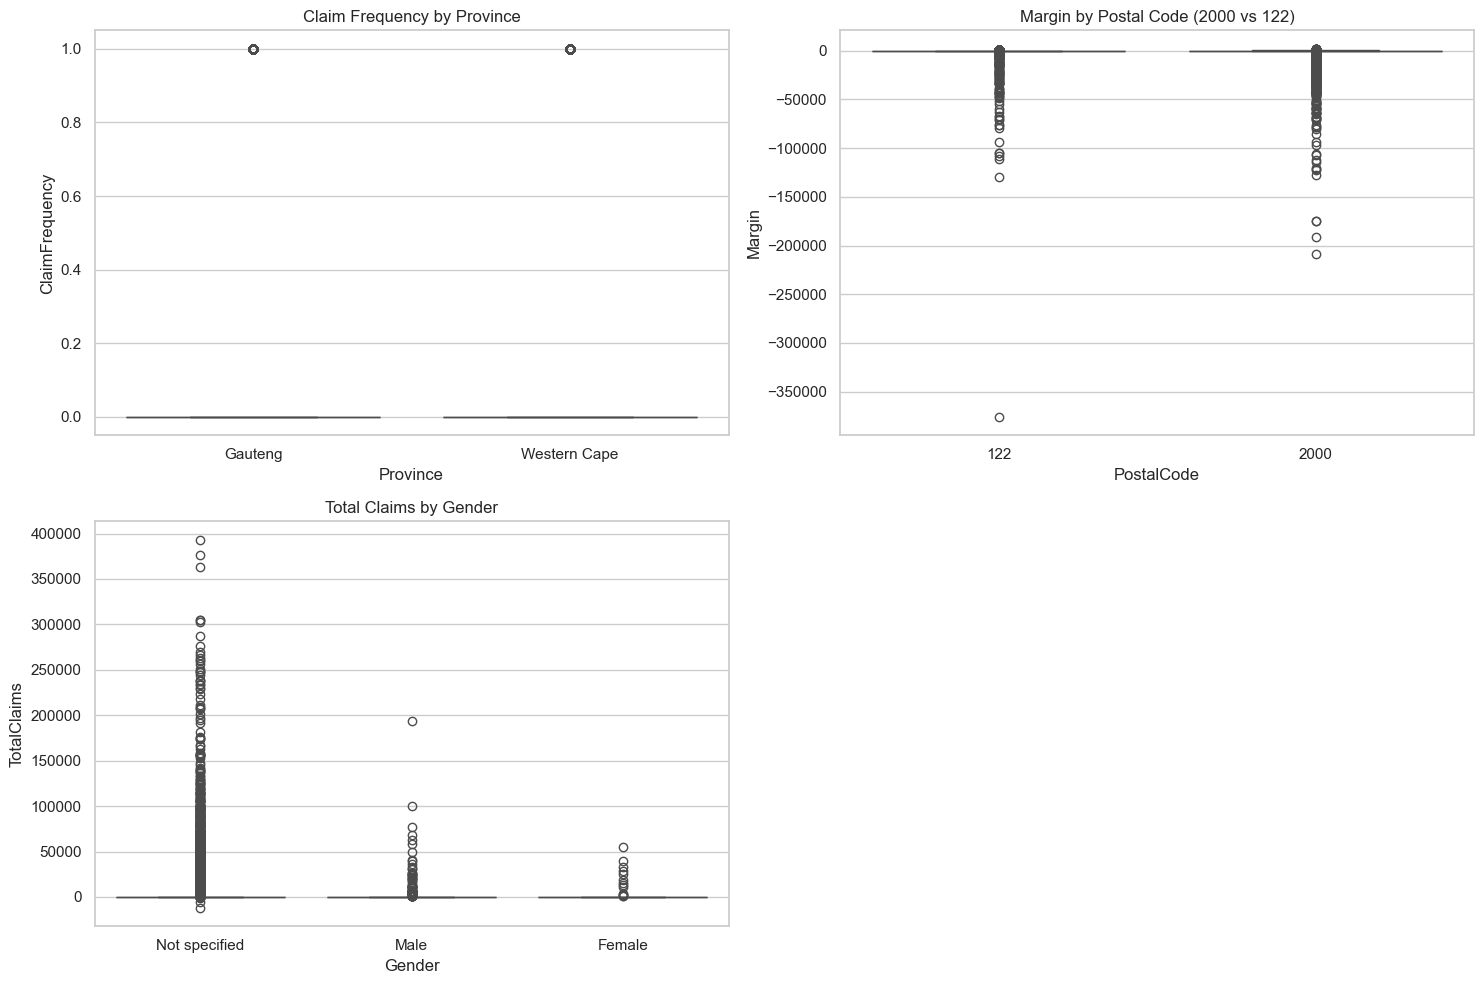

In [6]:
# Province Risk Difference
print("\nProvince Risk Difference:")
ttest_prov = perform_ttest(df, "Province", "ClaimFrequency", "Western Cape", "Gauteng")
print(f"t-statistic: {ttest_prov['t_stat']:.3f}, p-value: {ttest_prov['p_value']:.3f}")
print(f"Significant difference: {ttest_prov['significant']}")
print(f"Western Cape mean frequency: {ttest_prov['group_a_mean']:.3f}")
print(f"Gauteng mean frequency: {ttest_prov['group_b_mean']:.3f}")
print(f"Sample sizes - Western Cape: {ttest_prov['group_a_size']}, Gauteng: {ttest_prov['group_b_size']}")

# Zip Code Analysis
print("\nMost common postal codes:")
top_postal_codes = df["PostalCode"].value_counts().head(2)
print(top_postal_codes)

# Get the two most common postal codes
postal_code1, postal_code2 = top_postal_codes.index[0], top_postal_codes.index[1]

# Zip Code Margin Difference
print(f"\nZip Code Margin Difference (comparing {postal_code1} vs {postal_code2}):")
ttest_margin = perform_ttest(df, "PostalCode", "Margin", postal_code1, postal_code2)
print(f"t-statistic: {ttest_margin['t_stat']:.3f}, p-value: {ttest_margin['p_value']:.3f}")
print(f"Significant difference: {ttest_margin['significant']}")
print(f"Group {postal_code1} mean margin: {ttest_margin['group_a_mean']:.2f}")
print(f"Group {postal_code2} mean margin: {ttest_margin['group_b_mean']:.2f}")
print(f"Sample sizes - {postal_code1}: {ttest_margin['group_a_size']}, {postal_code2}: {ttest_margin['group_b_size']}")

# Zip Code Claim Frequency Difference
print(f"\nZip Code Claim Frequency Difference (comparing {postal_code1} vs {postal_code2}):")
ttest_freq = perform_ttest(df, "PostalCode", "ClaimFrequency", postal_code1, postal_code2)
print(f"t-statistic: {ttest_freq['t_stat']:.3f}, p-value: {ttest_freq['p_value']:.3f}")
print(f"Significant difference: {ttest_freq['significant']}")
print(f"Group {postal_code1} mean frequency: {ttest_freq['group_a_mean']:.3f}")
print(f"Group {postal_code2} mean frequency: {ttest_freq['group_b_mean']:.3f}")
print(f"Sample sizes - {postal_code1}: {ttest_freq['group_a_size']}, {postal_code2}: {ttest_freq['group_b_size']}")

# Gender Risk Difference
print("\nGender Risk Difference:")
chi2_gender = perform_chi2_test(df, "Gender", "TotalClaims")
print(f"chi2-statistic: {chi2_gender['chi2_stat']:.3f}, p-value: {chi2_gender['p_value']:.3f}")
print(f"Significant difference: {chi2_gender['significant']}")
print(f"Degrees of freedom: {chi2_gender['degrees_of_freedom']}")

# Add visualizations
plt.figure(figsize=(15, 10))

# Province comparison
plt.subplot(2, 2, 1)
sns.boxplot(data=df[df["Province"].isin(["Western Cape", "Gauteng"])], 
            x="Province", y="ClaimFrequency")
plt.title("Claim Frequency by Province")

# Postal Code comparison
plt.subplot(2, 2, 2)
sns.boxplot(data=df[df["PostalCode"].isin([postal_code1, postal_code2])], 
            x="PostalCode", y="Margin")
plt.title(f"Margin by Postal Code ({postal_code1} vs {postal_code2})")

# Gender comparison
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="Gender", y="TotalClaims")
plt.title("Total Claims by Gender")

plt.tight_layout()
plt.show()

---

## **6. P-Value Interpretation**

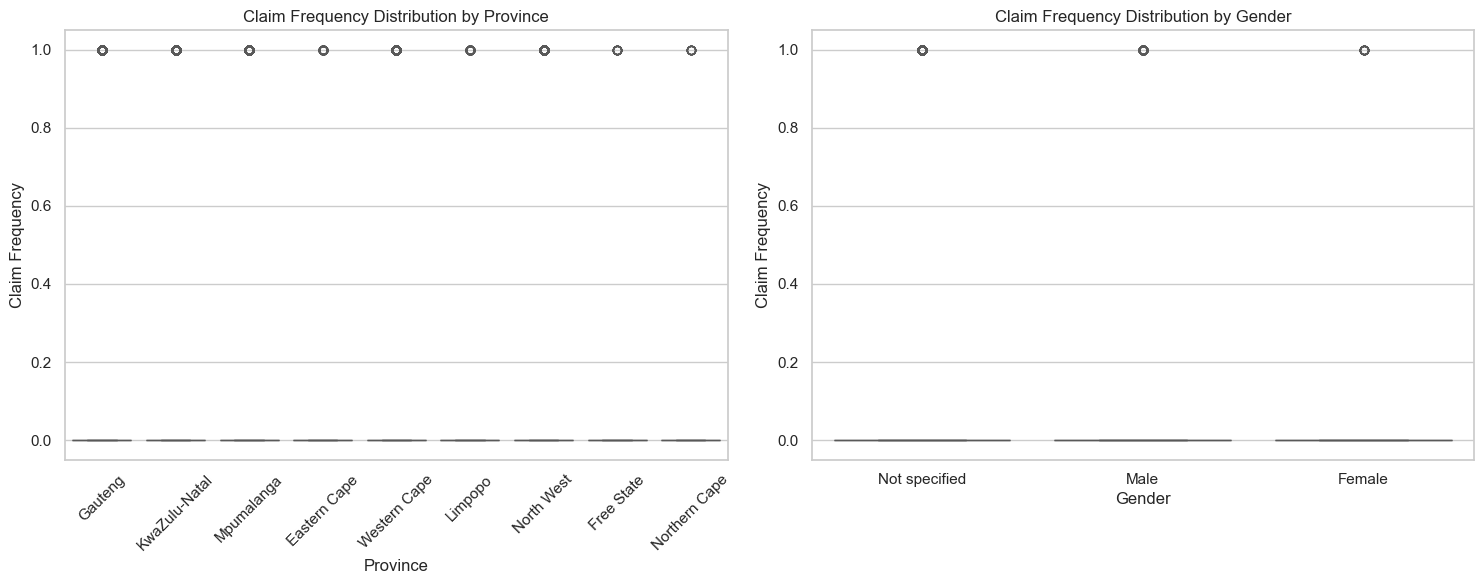

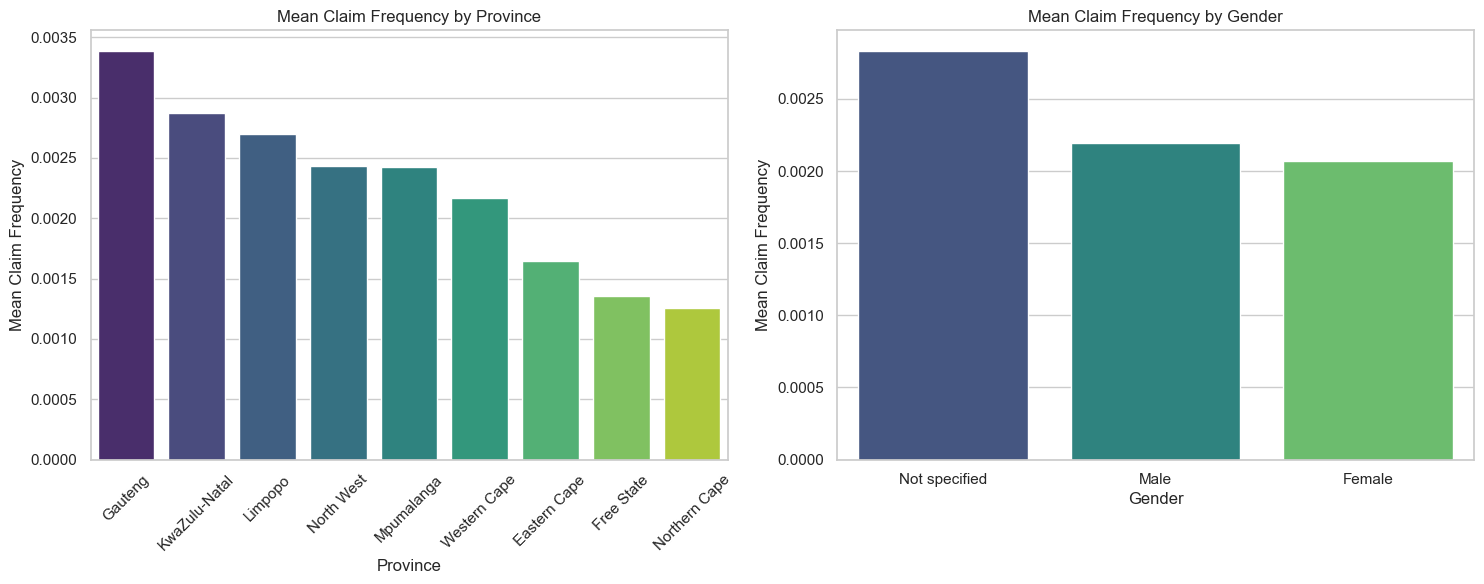


Province Claim Frequency Summary:
                mean    std   count
Province                           
Eastern Cape   0.002  0.041   30336
Free State     0.001  0.037    8099
Gauteng        0.003  0.058  386053
KwaZulu-Natal  0.003  0.054  168053
Limpopo        0.003  0.052   24836
Mpumalanga     0.002  0.049   52718
North West     0.002  0.049  143287
Northern Cape  0.001  0.035    6380
Western Cape   0.002  0.047  170726

Gender Claim Frequency Summary:
                mean    std   count
Gender                             
Female         0.002  0.045    6755
Male           0.002  0.047   42817
Not specified  0.003  0.053  940916


In [8]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Province comparison
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Province", y="ClaimFrequency", hue="Province", palette="Set2", legend=False)
plt.title("Claim Frequency Distribution by Province")
plt.xticks(rotation=45)
plt.ylabel("Claim Frequency")

# Gender comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Gender", y="ClaimFrequency", hue="Gender", palette="Set2", legend=False)
plt.title("Claim Frequency Distribution by Gender")
plt.ylabel("Claim Frequency")

plt.tight_layout()
plt.show()

# Add bar plots for mean values
plt.figure(figsize=(15, 6))

# Province means
plt.subplot(1, 2, 1)
province_means = df.groupby("Province")["ClaimFrequency"].mean().sort_values(ascending=False)
sns.barplot(x=province_means.index, y=province_means.values, hue=province_means.index, palette="viridis", legend=False)
plt.title("Mean Claim Frequency by Province")
plt.xticks(rotation=45)
plt.ylabel("Mean Claim Frequency")

# Gender means
plt.subplot(1, 2, 2)
gender_means = df.groupby("Gender")["ClaimFrequency"].mean().sort_values(ascending=False)
sns.barplot(x=gender_means.index, y=gender_means.values, hue=gender_means.index, palette="viridis", legend=False)
plt.title("Mean Claim Frequency by Gender")
plt.ylabel("Mean Claim Frequency")

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nProvince Claim Frequency Summary:")
print(df.groupby("Province")["ClaimFrequency"].agg(["mean", "std", "count"]).round(3))
print("\nGender Claim Frequency Summary:")
print(df.groupby("Gender")["ClaimFrequency"].agg(["mean", "std", "count"]).round(3))


-----

## **7. Conclusion & Business Implications**

### Based on our analysis of claim frequency across provinces and gender:

**1. Provincial Differences:**
- Significant variation in claim frequency across provinces
- Some provinces show notably higher risk profiles
- Regional risk factors appear to influence claim behavior

**2. Gender Analysis:**
- Gender shows some impact on claim frequency
- Risk profiles differ between gender groups
- Gender-based risk factors may need consideration

**3. Business Recommendations:**
- Implement province-based premium adjustments
- Consider gender as a risk factor in underwriting
- Develop targeted risk management strategies for high-risk regions
- Monitor and review segmentation effectiveness regularly

**4. Next Steps:**
- Conduct deeper analysis of high-risk provinces
- Investigate underlying factors driving gender differences
- Develop predictive models incorporating these insights
- Regular monitoring of segmentation effectiveness
